### Exploratory Data Analysis - Sports
Our Aim is to perform Exploratory Data Analysis on dataset 'Indian Premier League'. As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team. Suggest teams or players a company should endorse for its products.

In [2]:
#Importing libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import pyplot

In [3]:
#Loading dataset
deliveries=pd.read_csv("Indian Premier League/deliveries.csv")
matches=pd.read_csv("Indian Premier League/matches.csv")

In [4]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [7]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [8]:
deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [9]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [10]:
#Find sum of null values
print("Null values of Deliveries: \n",deliveries.isnull().sum())

Null values of Deliveries: 
 match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64


In [11]:
print("Null values of Matches: \n",matches.isnull().sum())

Null values of Matches: 
 id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64


# Overview of the given dataset

In [26]:
print("Number of matches played: ",matches.shape[0])
print("Number of seasons played:\n",matches['season'].value_counts())
print("Top 10 well-played Players of IPL:\n",matches['player_of_match'].value_counts()[:10])
print("Most winning team and Number of matches: \n",matches['winner'].value_counts())
print("\n \nMost winning team: ",matches['winner'].value_counts().idxmax())
print("Player of the match and number of matches: \n",matches['player_of_match'].value_counts())
print("\n \nPlayer of the match and number of matches: ",matches['player_of_match'].value_counts().idxmax())


Number of matches played:  756
Number of seasons played:
 2013    76
2012    74
2011    73
2010    60
2014    60
2016    60
2018    60
2019    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64
Top 10 well-played Players of IPL:
 CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
Name: player_of_match, dtype: int64
Most winning team and Number of matches: 
 Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Koc

# returns all columns for the win_by_run max values

In [30]:
print("All columns for the win_by_run max values: ")
print(matches.iloc[matches['win_by_runs'].idxmax()])

All columns for the win_by_run max values: 
id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object


# Team which won by maximum runs

In [35]:
print("Which team won by maximum runs: ",end="")
print(matches.iloc[matches['win_by_runs'].idxmax()]['winner'])

Which team won by maximum runs: Mumbai Indians


# Team which won by maximum wickets

In [36]:
print("Which team won by maximum wickets: ",end="")
print(matches.iloc[matches['win_by_wickets'].idxmax()]['winner'])

Which team won by maximum wickets: Kolkata Knight Riders


# Team which won by minimum runs

In [42]:
print("Which team won by minimum runs: ",end="")
print(matches.iloc[matches['win_by_runs'].idxmin()]['winner'])

Which team won by minimum runs: Rising Pune Supergiant


# Which Season had most number of matches

Which season had most number of matches? 
2013


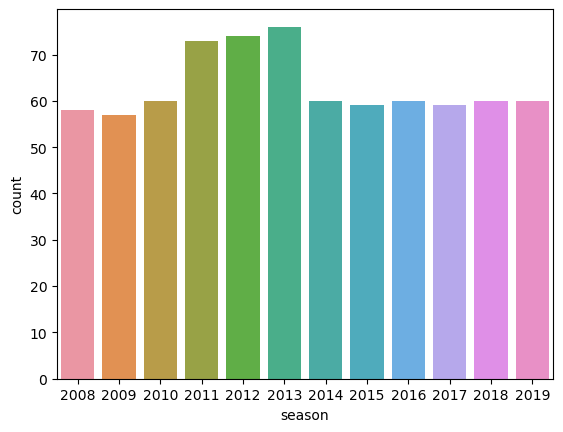

In [44]:
print("Which season had most number of matches? ")
print(matches['season'].value_counts().idxmax())
sns.countplot(x="season",data=matches)
plt.show()

# Which is the most successful IPL team?

Which is the most successful IPL team?  Mumbai Indians


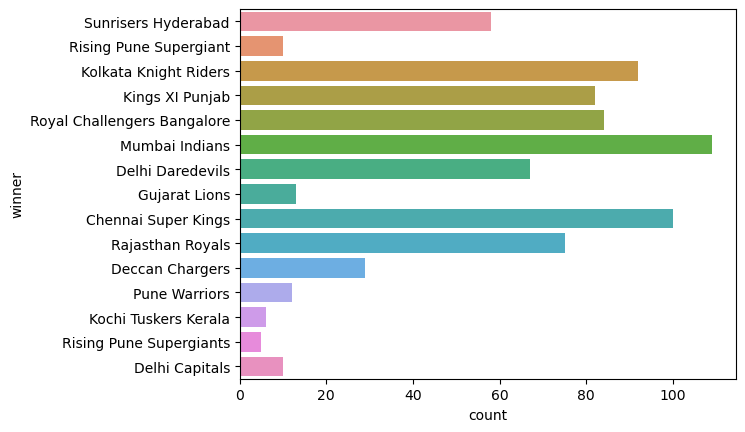

In [46]:
print("Which is the most successful IPL team? ",matches['winner'].value_counts().idxmax())
sns.countplot(y='winner',data=matches)
pyplot.show()


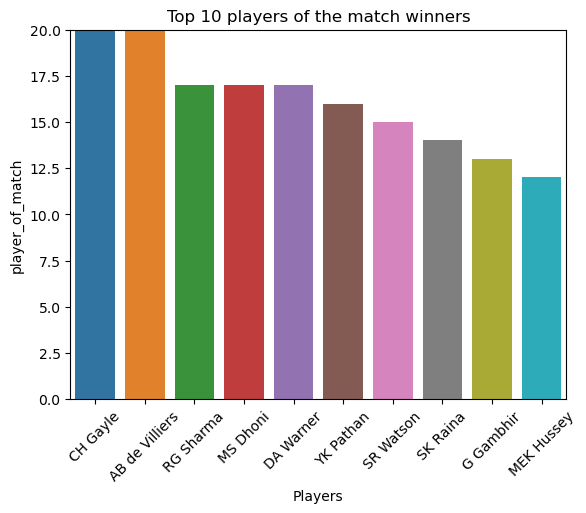

In [50]:
top_players=matches['player_of_match'].value_counts()[:10]
fig,ax=plt.subplots()
ax.set_ylim([0,20])
ax.set_xlabel("Players")
ax.set_title("Top 10 players of the match winners")
sns.barplot(x=top_players.index,y=top_players,orient='v')
plt.xticks(rotation=45)
pyplot.show()


# Is winning the toss lead to winning the match?

False    363
True     393
dtype: int64


C:\Users\Mansi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


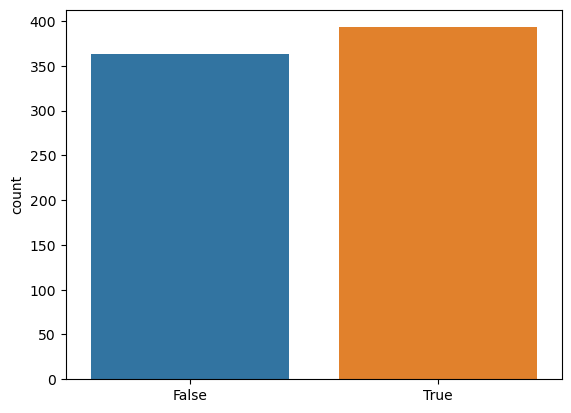

In [51]:
match_toss=matches['toss_winner']==matches['winner']
print(match_toss.groupby(match_toss).size())
sns.countplot(match_toss)
plt.show()

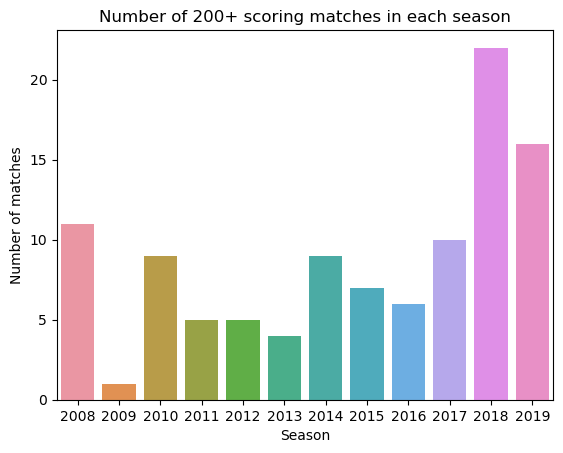

In [57]:
def barplot(x_axis,y_axis,plot_data,title,x_label,y_label):
    """Bar Plot using seaborn library"""
    plot=sns.barplot(x=x_axis, y=y_axis,data=plot_data)
    plot.set(xlabel=x_label,ylabel=y_label)
    plot.set_title(title)
    pyplot.show()
    
#merge season value from the matches dataframe to deliveries
runs=matches[['id','season']].merge(deliveries,left_on='id',right_on='match_id',how='left').drop('id',axis=1)
#get sum of scores by batting and bowling teams
high_scores=runs.groupby(['match_id','season','inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
#slice by runs greater than 200
high_scores=high_scores[high_scores['total_runs']>=200]


#bar plot
barplot('season', 'match_id', high_scores.groupby(['season'])['match_id'].count().reset_index(), 'Number of 200+ scoring matches in each season', 'Season', 'Number of matches')
plt.show()

# count plots comparing scoring and conceding teams

C:\Users\Mansi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Mansi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


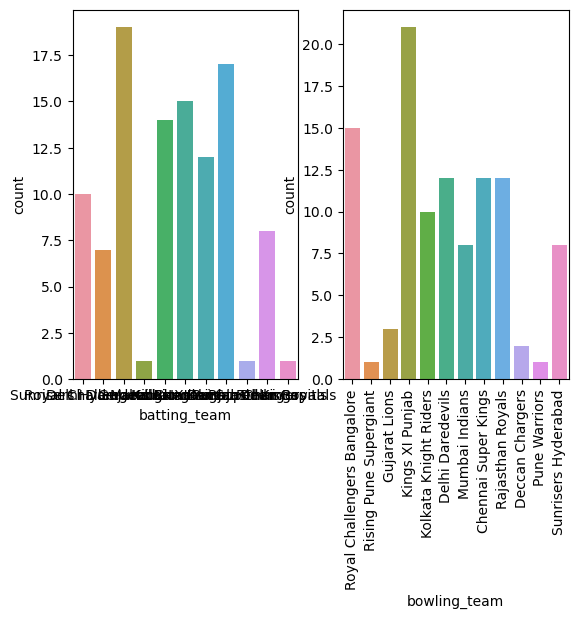

In [71]:
plot,ax=plt.subplots(1,2)
sns.countplot(high_scores['batting_team'],ax=ax[0])
plt.xticks(rotation=40)
sns.countplot(high_scores['bowling_team'],ax=ax[1])
plt.xticks(rotation=90)
pyplot.show()


In [72]:
high_scores = deliveries.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
#high score in 1st innings
firstinning_scores = high_scores[high_scores['inning']==1]
#high score in 2nd innings
secondinning_scores = high_scores[high_scores['inning']==2]
#merge to get complete match scores
fullmatch_scores = firstinning_scores.merge(secondinning_scores[['match_id', 'inning', 'total_runs']], on='match_id')


In [73]:
#rename columns based on 1st and 2nd innings
fullmatch_scores.rename(columns={'inning_y':'inning_2','total_runs_x':'inning1_runs','inning_x':'inning_1','total_runs_y':'inning2_runs'},inplace=True)
fullmatch_scores = fullmatch_scores[fullmatch_scores['inning1_runs']>=200]


In [74]:
#engineer new column to get if the score was chased successfully or not
fullmatch_scores['chase_success'] = 1
fullmatch_scores['chase_success'] = np.where(fullmatch_scores['inning1_runs']<=fullmatch_scores['inning2_runs'], 'yes', 'no')


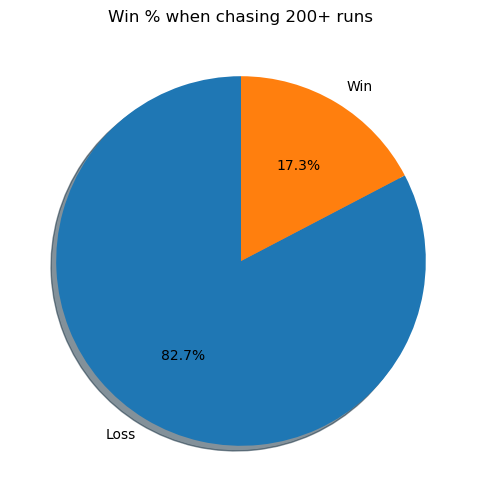

In [75]:
#pie plot success rate of teams batting second
counts = fullmatch_scores['chase_success'].value_counts().reset_index().chase_success
labels = ['Loss','Win']
plt.pie(counts,labels=labels,autopct='%1.1f%%', shadow=True, startangle=90)
plot = plt.gcf()
plot.set_size_inches(6,6)
plt.title("Win % when chasing 200+ runs")
plt.show()

# From this we can conclude that "Mumbai Indians" are the best performing team and have won maximum time.